## An example workflow

In [ ]:
#to use the full width of the browser window uncomment the code below and execute the cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [34]:
from pyPoseidon.model import *
from pyPoseidon.dem import *
from pyPoseidon.meteo import *
import datetime
from pyPoseidon.utils.data import *


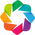

In [35]:
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs


hv.notebook_extension('bokeh')

In [36]:
#define in a dictionary the properties of the model..
dic={'minlon':160., # lat/lon window
     'maxlon':179.,
     'minlat':-49.,
     'maxlat':-33.,
     'solver':'d3d',
     'resolution':0.2, #grid resoltuion 
     'step':20, # step for output of map field in d3d
     'start_date':'2013-10-28',
     'time_frame':'2d',
 #    'end_date':'2013-10-30' optional end date instead of time_frame
     'ncores': 4 , #number of cores
     'rpath':'./test/', #location of calc folder
     'conda_env':'pyPoseidon' # conda env for running the solver
    }

### Create model

In [37]:
#initialize a model
b = model(**dic)

### set it up

In [38]:
b.set() #set it up 


extracting dem from http://coastwatch.pfeg.noaa.gov/erddap/griddap/srtm15plus

dem done

extracting meteo from https://bluehub.jrc.ec.europa.eu/erddap/griddap/NCEP_Global_Best

meteo done


### output to rpath 

In [39]:
#set the run by saving the files
b.output()

In [40]:
# save model info for further use
b.save()

In [ ]:
# save all matrices for further use
#b.pickle(path=path)

### execute

In [ ]:
#execute
b.run()

### Visualise

In [42]:
otp = data([dic['rpath']])

#### Grid & Bathymetry 

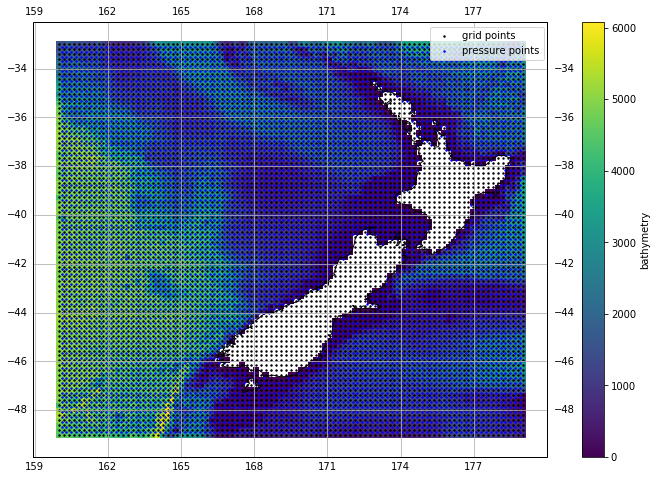

In [43]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(projection=ccrs.PlateCarree());

otp.dem.bathymetry.plot.pcolormesh('longitude', 'latitude', ax=ax);

gp = ax.scatter(otp.grid.lons, otp.grid.lats, s=2, color='k',  label='grid points', transform=ccrs.PlateCarree());

pp = ax.scatter(otp.xh, otp.yh, s=2, color='b', label='pressure points', transform=ccrs.PlateCarree());

ax.legend()

ax.coastlines('50m'); ax.gridlines(draw_labels=True);

#### Variable snapshot

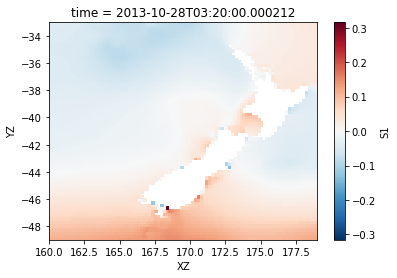

In [44]:
otp.vars.S1[10,:,:].plot() 

#### Holoviews

In [ ]:
%%opts Image [width=650 height=450 colorbar=True] (cmap='jet')
#Fast but no map
otp.hview('S1').to(hv.Image, ['XZ','YZ'])#.hist()

#### Geoviews

In [ ]:
#with map and zooming but dynamic colorbar to make it fast, otherwise slow and heavy
g50 = gv.feature.coastline(plot=dict(scale='50m'), style=dict(linewidth=1.5))

In [ ]:
%%opts Image [colorbar=True width=650 height=450 toolbar="above"  tools=['hover']] (cmap='viridis')
otp.gview('S1').to(gv.Image, ['XZ','YZ'], dynamic=True) * gf.coastline() * gf.borders()

#### Inherent Animation option

In [ ]:
# relatively fast and you can save in mp4
otp.frames(['S1'],title='SSH')

In [ ]:
# relatively fast and you can save in mp4
otp.frames(['U1','V1'],title='Sea Vectors',scale=.1)

### Observation points

In [47]:
otp.obs.locations # in-situ measurements available within the lat/lon window

,SSC ID,Station Name,Country_x,Latitude,Longitude,IOC code,PTWC code,GLOSS ID_x,UHSLC ID,PSMSL ID,...,Country_y,Location,Connection,DCP ID,Last observation Level,Time in GMT,Delay,TransmitInterval,View,point
0,SSC-cpit,Castlepoint,New Zealand,-40.90,176.23,cpit,cpit,NaN,NaN,NaN,...,New Zealand,Castlepoint,SZNZ01,CPIT,4.01,08:46,13',3',[open],1446.0
1,SSC-gist,Gisborne,New Zealand,-38.68,178.02,gist,gist,NaN,78,1613,...,New Zealand,Gisborne,SZNZ01,GIST,4.34,08:47,12',3',[open],885.0
2,SSC-jack,Jackson Bay,New Zealand,-43.97,168.62,jack,"jack, jbay",NaN,403,1882,...,New Zealand,Jackson Bay,SZPS01,65180,1.98,08:53,6',6',[open],1653.0
3,SSC-kait,Kaikoura,New Zealand,-42.41,173.70,kait,kait,NaN,NaN,NaN,...,New Zealand,Kaikoura,SZNZ01,KAIT,2.20,08:46,13',3',[open],1515.0
4,SSC-lott,East Cape,New Zealand,-37.55,178.16,lott,lott,NaN,NaN,NaN,...,New Zealand,East Cape,SZNZ01,LOTT,4.17,08:47,12',3',[open],1334.0
5,SSC-mnkt,Manakau,New Zealand,-37.05,174.51,mnkt,mnkt,NaN,NaN,NaN,...,New Zealand,Manakau,SZNZ01,MNKT,3.56,08:46,13',3',[open],1533.0
6,SSC-napt,Port Napier,New Zealand,-39.48,176.92,napt,napt,NaN,668,1750,...,New Zealand,Port Napier,SZNZ01,NAPT,3.23,08:47,12',3',[open],NaN
7,SSC-otat,Dunedin,New Zealand,-45.81,170.63,otat,otat,NaN,669,"136, 1643, 252",...,New Zealand,Dunedin,SZNZ01,OTAT,3.78,08:47,12',3',[open],1567.0
8,SSC-puyt,Puysegur Welcome Bay,New Zealand,-46.08,166.59,puyt,puyt,NaN,NaN,NaN,...,New Zealand,Puysegur Welcome Bay,SZNZ01,PUYT,5.95,08:47,12',3',[open],1466.0
9,SSC-sumt,Christchurch,New Zealand,-43.57,172.77,sumt,sumt,NaN,667,"247, 259",...,New Zealand,Christchurch,SZNZ01,SUMT,0.33,2017-01-26 16:32,238d,3',[open],NaN


In [48]:
# Get with index number
p = otp.obs.iloc(1)
p.head()

,Total Sea Level,Tide,Storm Surge
time,,,
2013-10-28 00:01:00,4.520,4.554,-0.034
2013-10-28 00:03:00,4.526,4.556,-0.030
2013-10-28 00:05:00,4.514,4.558,-0.044
2013-10-28 00:07:00,4.522,4.560,-0.038
2013-10-28 00:09:00,4.522,4.562,-0.040


In [49]:
#get with Station Name  
p = otp.obs.loc('Gisborne')
p.head()

,Total Sea Level,Tide,Storm Surge
time,,,
2013-10-28 00:01:00,4.520,4.554,-0.034
2013-10-28 00:03:00,4.526,4.556,-0.030
2013-10-28 00:05:00,4.514,4.558,-0.044
2013-10-28 00:07:00,4.522,4.560,-0.038
2013-10-28 00:09:00,4.522,4.562,-0.040


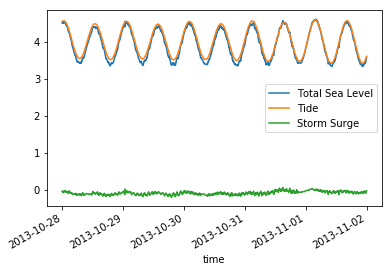

In [50]:
#plot
ax = p.plot()

#### sample nearest point from simulation 

In [51]:
lat,lon = otp.obs.locations.loc[1,['Latitude','Longitude']] #get lat lon from tide gauge
print lat, lon

-38.68 178.02


In [52]:
ts = otp.vars.S1.sel(XZ=[lon], method='nearest').sel(YZ=[lat], method='nearest')
otp.vars.XZ.sel(XZ=[lon], method='nearest'), otp.vars.YZ.sel(YZ=[lat], method='nearest')

(<xarray.DataArray 'XZ' (XZ: 1)>
 array([ 178.090424], dtype=float32)
 Coordinates:
   * XZ       (XZ) float32 178.09, <xarray.DataArray 'YZ' (YZ: 1)>
 array([-38.772152], dtype=float32)
 Coordinates:
   * YZ       (YZ) float32 -38.7722)

In [53]:
#Check ts, could be nan
ts = ts.squeeze().to_pandas()
ts.head()

time
2013-10-28 00:00:00.000000000    0.000000
2013-10-28 00:19:59.999942656   -0.001407
2013-10-28 00:39:59.999885312   -0.004115
2013-10-28 00:59:59.999959040    0.010771
2013-10-28 01:19:59.999770624    0.025101
dtype: float32

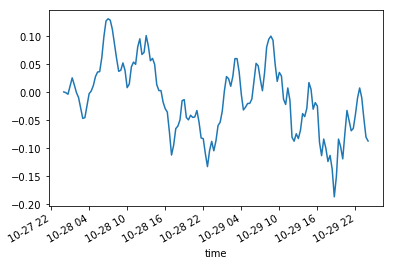

In [54]:
ts.plot()

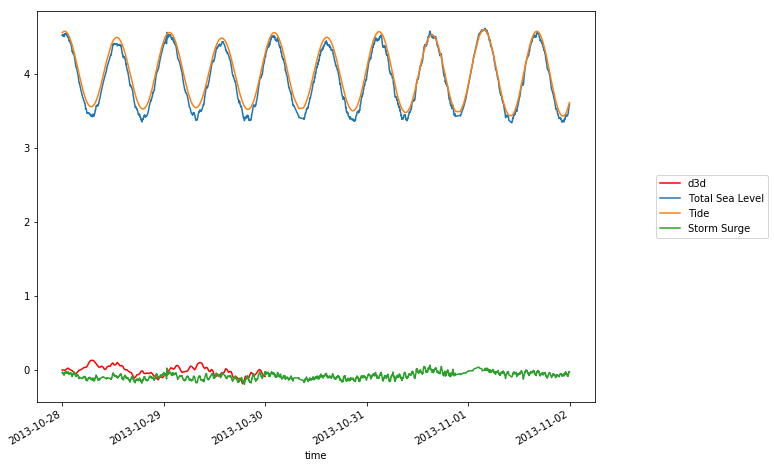

In [55]:
## Join the graphs
ax = ts.plot(figsize=(10,8),color=['r'],label='d3d')
p.plot(ax=ax)
ax.legend(loc='center left',bbox_to_anchor=(1.1, 0.5))